# Examining Racial Discrimination in the US Job Market

### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés to black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes when presented to the employer.

<div class="span5 alert alert-info">
### Exercises
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.
   4. Write a story describing the statistical significance in the context or the original problem.
   5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet
+ Formulas for the Bernoulli distribution: https://en.wikipedia.org/wiki/Bernoulli_distribution
</div>
****

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import random
from scipy.stats import t, norm
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [175]:
# number of callbacks for black-sounding names
sum(df[df.race=='w'].call)

235.0

In [176]:
df.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [188]:
df.describe()

,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,occupbroad,workinschool,...,educreq,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind
count,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,...,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000,4870.000000
mean,3.618480,3.661396,7.842916,0.052772,0.411499,0.097125,0.448049,215.637782,3.481520,0.559548,...,0.106776,0.437166,0.072690,0.082957,0.030390,0.085010,0.213963,0.267762,0.154825,0.165092
std,0.714997,1.219126,5.044612,0.223601,0.492156,0.296159,0.497345,148.127551,2.038036,0.496492,...,0.308866,0.496083,0.259649,0.275854,0.171677,0.278932,0.410141,0.442847,0.361773,0.371308
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.000000,3.000000,5.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,6.000000,0.000000,0.000000,0.000000,0.000000,267.000000,4.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000,4.000000,9.000000,0.000000,1.000000,0.000000,1.000000,313.000000,6.000000,1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,4.000000,7.000000,44.000000,1.000000,1.000000,1.000000,1.000000,903.000000,6.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [178]:
(rows, cols) = df.shape
print("There are a total of {} observations in the data set ".format(rows))

There are a total of 4870 observations in the data set 


In [4]:
n = len(df)

w = df[df.race=='w']
b = df[df.race=='b']

w_call = w['call']
b_call = w['call']

# count of records in each sample
w_cnt = w['call'].count()
b_cnt = b['call'].count()

# count of successful call-backs ('1') in each sample
w_s = sum(w.call)
b_s = sum(b.call)
sum_calls = (w_s + b_s)

print("There are",b_cnt, "observations with black-sounding names.")
print("There are",w_cnt, "observations with white-sounding names.")
print("There are",n, " total observations.")
print("\n")
print("There were", b_s, "call-backs for black-sounding names.")
print("There were", w_s, "call-backs for white-sounding names.")
print("There were", sum_calls, " total call-backs.")

There are 2435 observations with black-sounding names.
There are 2435 observations with white-sounding names.
There are 4870  total observations.


There were 157.0 call-backs for black-sounding names.
There were 235.0 call-backs for white-sounding names.
There were 392.0  total call-backs.


In [5]:
#Calculating the proportions per racial group 
prop_b = ((sum(b.call))/(len(b.call)))
prop_w = ((sum(w.call))/(len(w.call)))
prop_b, prop_w # p-hats for both black and white

(0.06447638603696099, 0.09650924024640657)

The calculated proportions of each group reveal that the black-sounding names lave a lower rate/proportions of call-backs, compared to white-sounding names (6.45% vs. 9.65%).

In [186]:
# ECDF function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""

    # Number of data points: n
    n = len(data)

    # x: sort the data
    x = np.sort(data)

    # y: range for y-axis
    y = np.arange(1, n+1) / n

    return x, y

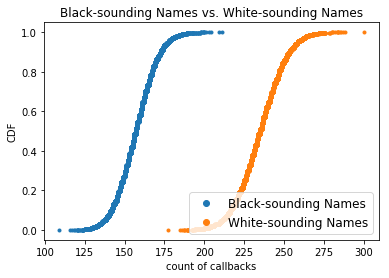

In [189]:
# Plot CDFs of callbacks for black- vs. white-sounding names
w_samples = np.random.binomial(w_cnt, prop_w, size=10000)
b_samples = np.random.binomial(b_cnt, prop_b, size=10000)

bx, by = ecdf(b_samples)
_ = plt.plot(bx, by, marker='.', linestyle='none')

wx, wy = ecdf(w_samples)
_ = plt.plot(wx, wy, marker='.', linestyle='none')

plt.margins = 0.02

_ = plt.xlabel('count of callbacks')
_ = plt.ylabel('CDF')
_ = plt.title('Black-sounding Names vs. White-sounding Names')
_ = plt.legend(('Black-sounding Names', 'White-sounding Names'), loc='lower right', fontsize='large', markerscale=2)



<div class="span5 alert alert-success">
<p>Your answers to Q1 and Q2 here</p>
    <p><b>1. What test is appropriate for this problem? Does CLT apply?</b></p>
        <blockquote>
        <p>The appropriate test for this problem will be a  Z-Test for Difference in Proportion. We are using the z-statistic because there is a large sample size, and there is no t-test for Difference in Proportion.  And, as the sample sizes are greater than 30, the CLT is applicable.</p>
        </blockquote>
    <p></p>
    <p><b>2. What are the null and alternate hypotheses?</b></p>
        <blockquote>
        <p>H0: There is no difference in the proportion/rate of call-backs between the black-sounding names and white-sounding names on the resumes (call_back_rate_w - call_back_rate_b = 0).</p>
        <p>H1: There is a difference in the proportion/rate of call-backs between the black-sounding names and white-sounding names on the resumes (call_back_rate_w - call_back_rate_b != 0).</p>
      <p>Significance Level = .05</p>
        </blockquote>
</div>

### Frequentist Approach

In [239]:
# Use statsmodels.stats.proportion.proportions_ztest for a test for proportions based on normal (z) test
# https://www.statsmodels.org/dev/generated/statsmodels.stats.proportion.proportions_ztest.html#statsmodels.stats.proportion.proportions_ztest
z, p_value = sm.stats.proportions_ztest([w_s, b_s], [w_cnt, b_cnt])
print("z-score is ",z)
#print(p_value)
print("p-value is 0.00003983886837585077")

z-score is  4.108412152434346
p-value is 0.00003983886837585077


In [219]:
# Confidence interval (95%)
# statsmodel confidence interval for z-test for proportion only seems to handle one sample
#prop_diff = prop_w - prop_b
#print("Observed difference in proportions = ", prop_diff)

ci = sm.stats.zconfint(w_call, b_call, alpha=0.05, alternative='two-sided', ddof=0)
print(ci)

(-0.016586697353791684, 0.016586697353791684)


In [8]:
# Confidence interval (95%)
# statsmodel confidence interval for z-test for proportion only seems to handle one sample
prop_diff = prop_w - prop_b
print("Observed difference in proportions = ", prop_diff)

z_crit = 1.96
p_hat1 = prop_w*(1-prop_w)/w_cnt
p_hat2 =  prop_b*(1-prop_b)/b_cnt
ci_high = prop_diff + z_crit*(np.sqrt(p_hat1 + p_hat2))
ci_low = prop_diff - z_crit*(np.sqrt(p_hat1 + p_hat2))

print('95% conf int: \t {} - {}'.format(ci_low, ci_high))
ME = (ci_high - ci_low)/2
print('Margin of err: \t +/-{}'.format(ME))

Observed difference in proportions =  0.032032854209445585
95% conf int: 	 0.016777447859559147 - 0.047288260559332024
Margin of err: 	 +/-0.015255406349886438


### Bootstrap Approach

In [9]:
# Construct arrays of data: white-sounding names, black-sounding names
all_callbacks = np.array([True] * int(sum_calls) + [False] * int(n-sum_calls))
size = 10000

#create an empty array of 10,000 bootstrap replicates
bs_reps_diff = np.empty(size)

# create bootstrap replicates and replicates of difference
for i in range(size):
    w_bs_replicates = np.sum(np.random.choice(all_callbacks, size=w_cnt))
    b_bs_replicates = np.sum(np.random.choice(all_callbacks, size=b_cnt))
    
    bs_reps_diff[i] = (w_bs_replicates - b_bs_replicates)/b_cnt

bs_p_value = np.sum(bs_reps_diff >= prop_diff) / len(bs_reps_diff)

# calculate 95% CI
bs_ci = np.percentile(bs_reps_diff, [2.5, 97.5])
bs_mean_diff = np.mean(bs_reps_diff)


print('obs diff: {}\n'.format(prop_diff))
print('p-value: {}\n95% conf. int.: {}'.format(bs_p_value, bs_ci))

obs diff: 0.032032854209445585

p-value: 0.0
95% conf. int.: [-0.01519507  0.01560575]


In [248]:
print(np.max(bs_reps_diff))

0.030390143737166326


<div class="span5 alert alert-success">
    <p>Your solution to Q3 here</p>
    <p><b>3. Compute margin of error, confidence interval, and p-value. Try using both the bootstrapping and the frequentist statistical approaches.</b></p>
    <blockquote><p>The <b>observed difference in proportions</b> between white-sounding names and black-sounding names is 0.032032854209445585.</p></blockquote>
    <h3>Frequentist Approach</h3>
    <p>Using the frequentist approach (Z-Test for Difference in Proportion), the following results were found:<br />
    <blockquote><b>p-value: </b>  0.00003983886837585077<br />
        <b>95% conf int:</b> 	 0.016777447859559147, 0.047288260559332024<br />
        <b>Margin of err:</b> 	 +/-0.015255406349886438<br />
        </blockquote>
    </p>
    <h3>Bootstrap Approach</h3>
  <p>Using the bootstrap approach, the following results were obtained:<br />
    <blockquote><b>p-value:</b> 0.0<br />
    <b>95% conf int:</b>  (-0.01519507, 0.01519507)
        
  <p>The p-value for both the frequentist approach and the bootstrap approach is less than .05, so we can reject the null hypothesis that there is no difference in the proportion/rate of call-backs between the black-sounding names and white-sounding names on the resumes (call_back_rate_w - call_back_rate_b = 0). </p>   
  
  <p>The null hypothesis states that (<i>proportion of call-backs for white-sounding names - proportion of call-backs for white-sounding names = 0</i>). Using the frequentist approach, the 95% confidence interval is 1.68% - 4.73%, which is above 0%, so the null hypothesis can be rejected.</p>
    <p>When drawing 10,000 bootstrap samples, the greatest difference between the success rates of call-backs between the black-sounding names and white-sounding names is 2.96%, which is below the observed difference of 3.2%, and again, we can reject the null hypothesis.</p>

<p>We can therefore conclude that for samples taken from the same population, the difference in proportions will not be as great as the empirical results, at least 95% of the time.</p>
</div>

<div class="span5 alert alert-success">
<p> Your answers to Q4 and Q5 here </p>
    <p><b>4. Write a story describing the statistical significance in the context or the original problem.</b></p>
    <blockquote><p>The test of the hypothesis has shown that the rate (proportion) of callbacks for resumes with white-sounding names is significantly higher than the rate of callbacks for resumes with black-sounding names. In fact, resumes with white-sounding names received 50 percent more callbacks than those with black-sounding names.</p></blockquote>

<p><b>5. Does your analysis mean that race/name is the most important factor in callback success? Why or why not? If not, how would you amend your analysis?</b></p>
<p></p>
<blockquote><p>Given that the study's researchers conducted the study "by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers," all of the other variables in the résumés were controlled for, and the only difference is the name on the resume. I can confidently state that my analysis does show that race/name is the most important factor in callback success.</p></blockquote>
</div>